## Importing Libraries 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2025-04-18 11:47:49.880559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 11:47:50.032809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 11:47:50.171739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744957070.291064    4332 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744957070.322235    4332 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744957070.564801    4332 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Data Preprocessing

#### Traninig Image Preprocessing

In [3]:
# Define the directory path to the dataset
directory = "train"

training_set=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2025-04-18 11:48:01.560016: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### Validation Image Preprocessing

In [4]:
# Define the directory path to the dataset
directory = "valid"

validation_set=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x.shape)
    print(y.shape)
    break

(32, 128, 128, 3)
(32, 38)


### Building Model

#### To Avoid Overshotting
1. Chose small Laerning Rate
2. There may be the chance of underfitting,so increase Number of neurons
3. Add More Convolution Layer And More feature from Images,There may be possibi;ity that model unable to capture efficient feature

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential


In [9]:
model=Sequential()

In [10]:
## Bulding Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/home/gaurav/Projects/Plant Disase/venvplant/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))# To avoid Overfitting

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
## Output Layer
from keras import layers
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(units=38,activation='softmax'))

In [20]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.0001)

### Compling the Model

In [21]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4, 4, 1500)     │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 1500)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1500)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,538,762 (21.13 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
## Set Up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


## Model Traning

In [24]:
training_history=model.fit(x=training_set,
          validation_data=validation_set,
          epochs=1,batch_size=32,callbacks=[early_stopping_callback],
          verbose=1,
          )

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8622s 4s/step - accuracy: 0.4003 - loss: 2.0941 - val_accuracy: 0.8372 - val_loss: 0.5061


## Model Evalutaion

In [25]:
# Model Evaluation on traning set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2494s 1s/step - accuracy: 0.8427 - loss: 0.4898


In [26]:
print(train_loss,train_acc)

0.4786168038845062 0.8462479710578918


In [27]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 477s 868ms/step - accuracy: 0.8388 - loss: 0.5023


In [28]:
print(val_loss,val_acc)

0.506112813949585 0.8372410535812378


## Saving Model

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.6114374995231628],
 'loss': [1.2982929944992065],
 'val_accuracy': [0.8372410535812378],
 'val_loss': [0.5061125755310059]}

In [31]:
## Recording History In json
import json
with open('traning_hist.json','w')as f:
        json.dump(training_history.history,f)

## Accuracy Visulatization

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

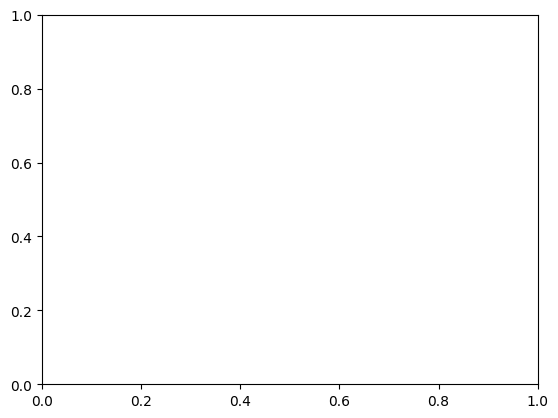

In [32]:
epochs=[i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy',color='blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Some Other metrics for model evaluation

In [33]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred=model.predict(test_set)
y_pred.shape
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 475s 864ms/step


array([[9.7646809e-01, 8.5938526e-03, 3.9531869e-06, ..., 1.4709101e-08,
        6.8497968e-08, 2.5860490e-06],
       [7.0568436e-01, 2.8243032e-01, 4.1167579e-05, ..., 1.2989709e-10,
        4.6204246e-08, 1.8110565e-07],
       [9.8693651e-01, 2.6743186e-03, 9.6024351e-06, ..., 8.0243388e-11,
        6.9386985e-08, 2.7533105e-07],
       ...,
       [2.0030279e-07, 4.1112969e-08, 3.1894592e-06, ..., 5.9089128e-10,
        2.0648585e-08, 9.9975449e-01],
       [3.2653159e-07, 1.0991504e-08, 2.1519029e-06, ..., 1.0882766e-10,
        6.6656636e-10, 9.9996758e-01],
       [8.2117341e-10, 9.9389528e-09, 1.3421654e-11, ..., 2.0899461e-11,
        1.8657446e-06, 9.9832612e-01]], dtype=float32)

In [37]:
predicted_category=tf.argmax(y_pred,axis=1)

In [38]:
predicted_category

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-04-18 21:28:58.636929: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true,predicted_category,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.72      0.80       504
                                 Apple___Black_rot       0.84      0.93      0.88       497
                          Apple___Cedar_apple_rust       0.83      0.84      0.84       440
                                   Apple___healthy       0.87      0.64      0.74       502
                               Blueberry___healthy       0.79      0.94      0.86       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.59      0.74       421
                 Cherry_(including_sour)___healthy       0.95      0.60      0.73       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.73      0.83       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.82      0.96      0.

In [45]:
cn=confusion_matrix(Y_true,predicted_category)
cn

array([[364,  22,   1, ...,   0,   0,   1],
       [  1, 460,   0, ...,   0,   0,   0],
       [  4,   1, 369, ...,   0,   1,   2],
       ...,
       [  0,   0,   4, ..., 413,   0,   0],
       [  0,   0,   0, ...,   0, 429,   0],
       [  0,   0,   0, ...,   0,   0, 458]])

## Confusion Metrices Visulaization

<function matplotlib.pyplot.show(close=None, block=None)>

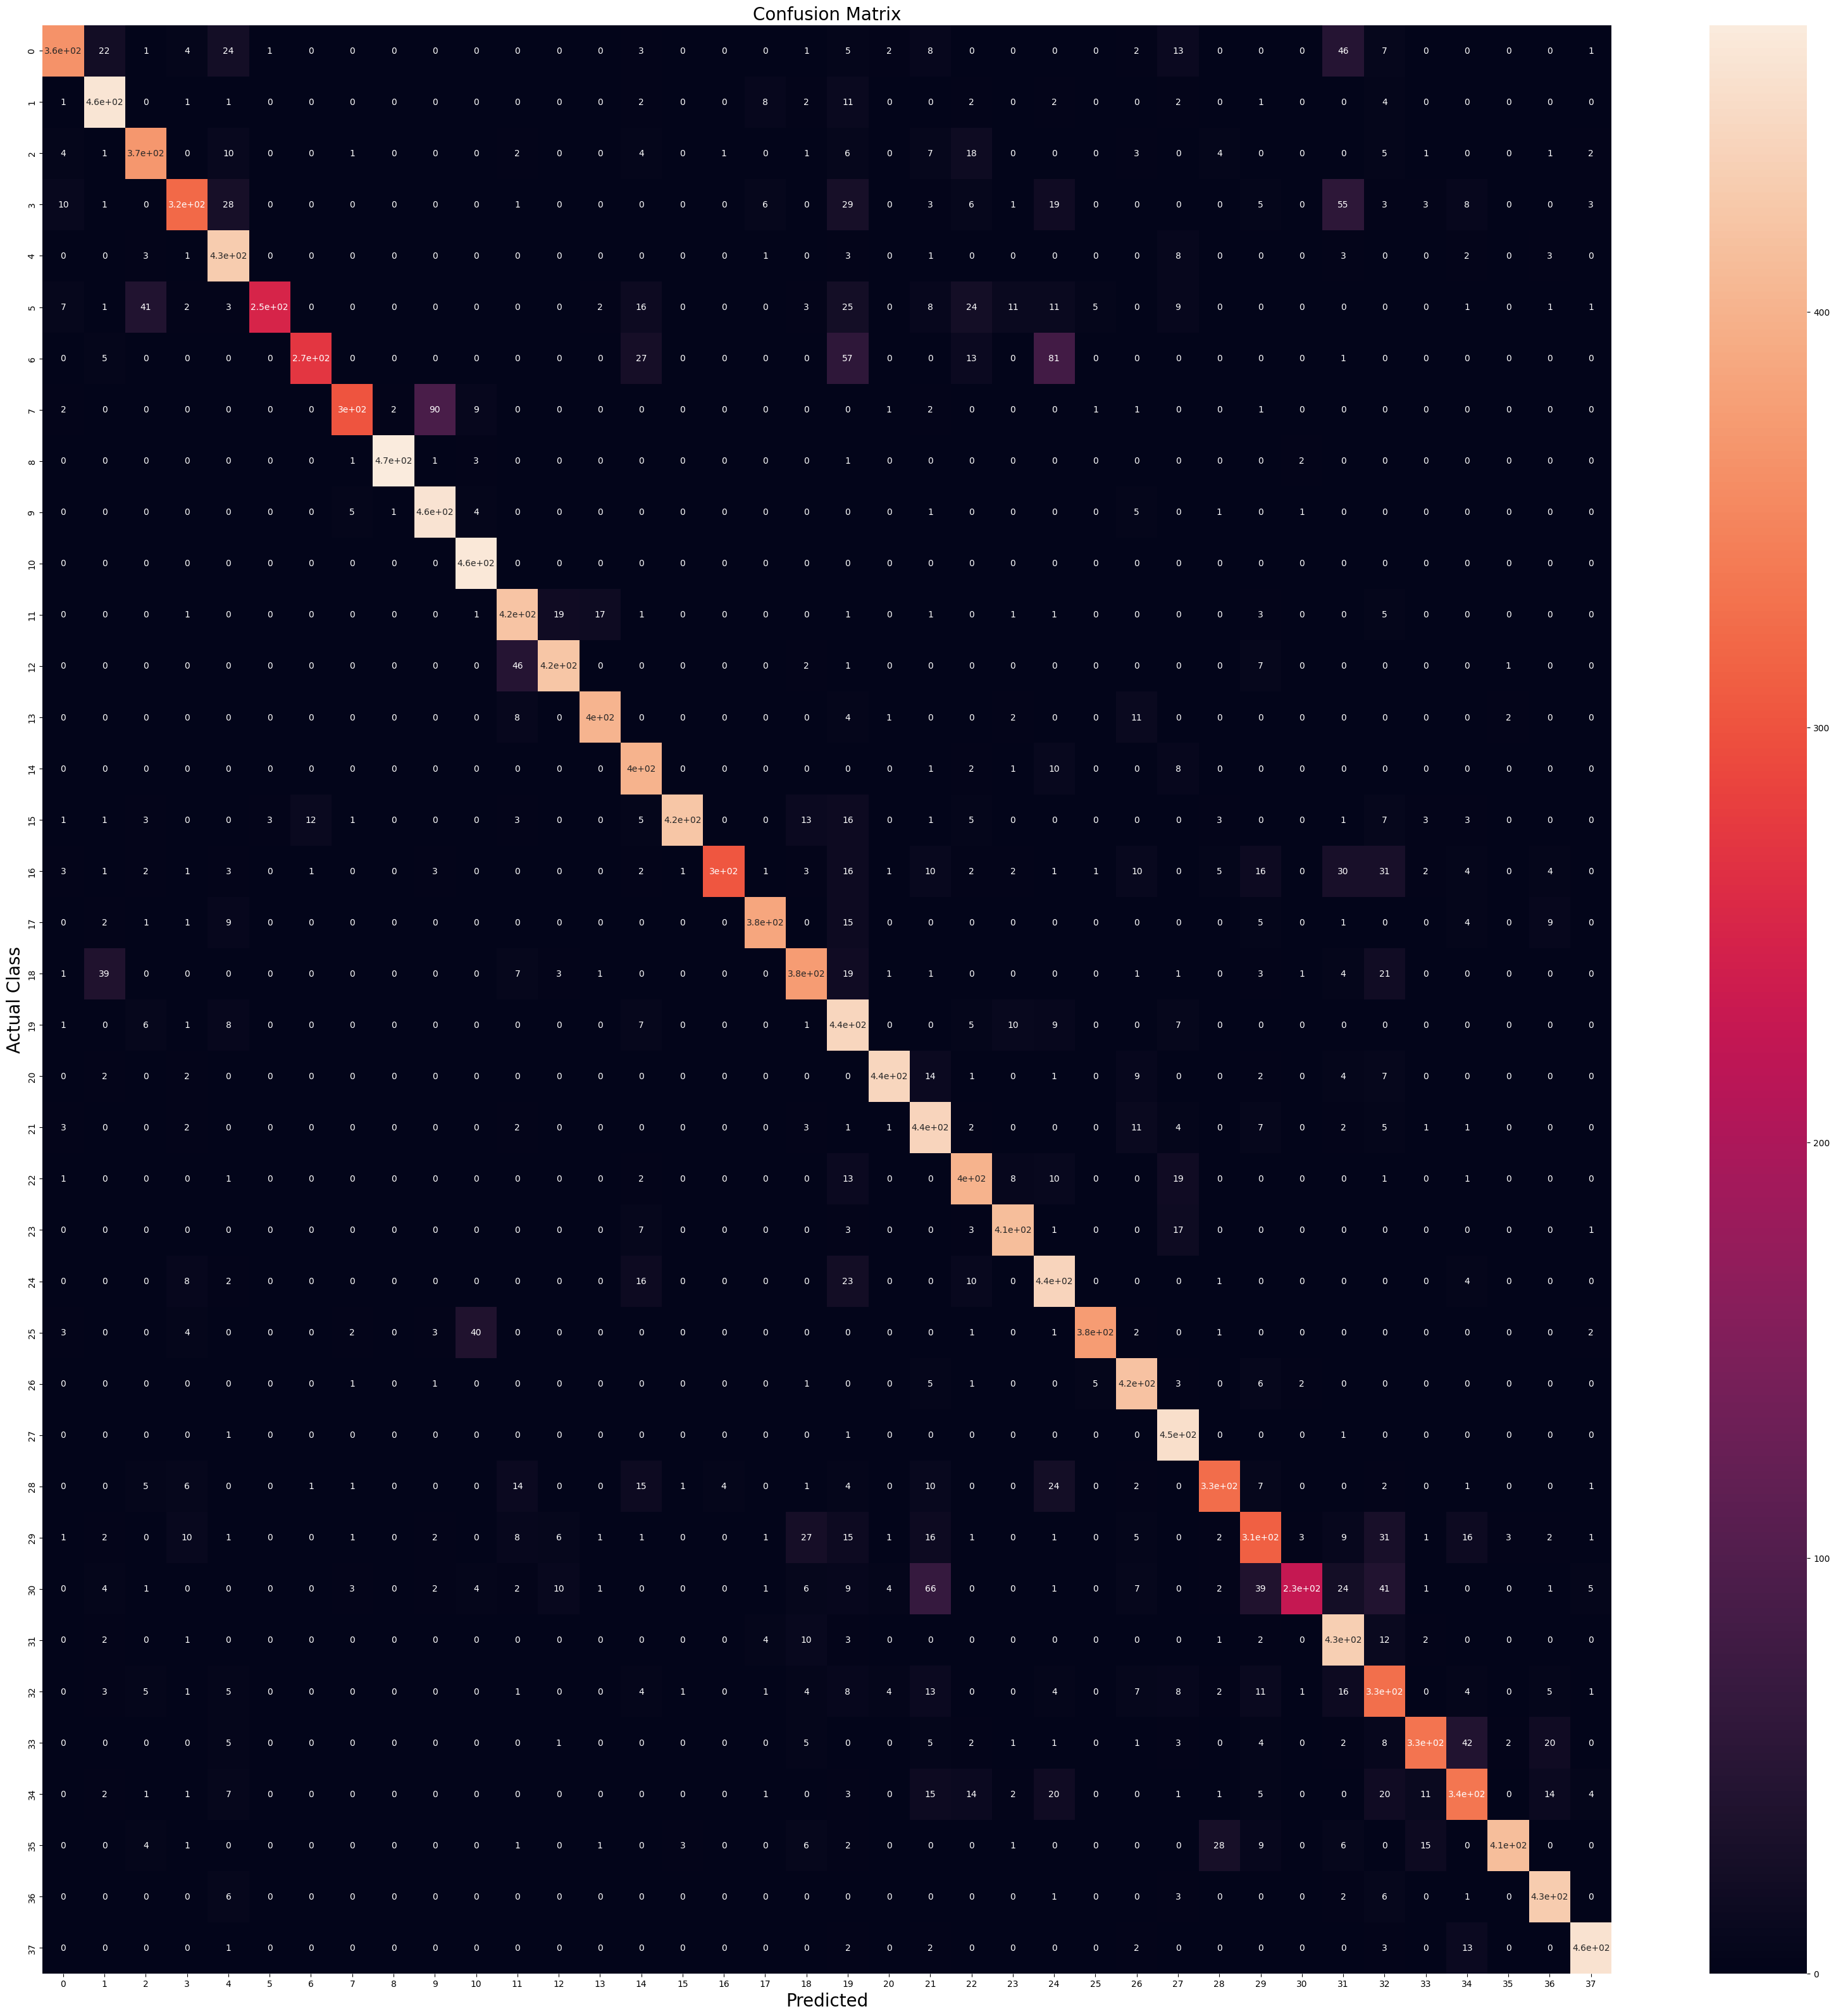

In [51]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Confusion Matrix',fontsize=20)
plt.show